In [1]:
import sys, os
#default path for current release 
sys.path.append("/opt/lumerical/v232/api/python/lumapi.py") 
os.path.dirname(os.path.abspath("__file__"))
import matplotlib
import matplotlib.pyplot as plt
import numpy as np


In [2]:
import importlib.util
#default path for current release 
spec_lin = importlib.util.spec_from_file_location('lumapi', "/opt/lumerical/v232/api/python/lumapi.py")
#Functions that perform the actual loading
lumapi = importlib.util.module_from_spec(spec_lin)
spec_lin.loader.exec_module(lumapi)

In [4]:
fdtd = lumapi.INTERCONNECT()


In [592]:
J_file="/home/satadrudas/Photonics/Photonic_Ising_chip/Lumerical_files/Sandbox/Maxcut_instances/s_100.txt"
f = open(J_file,"r")
N_spins, number_of_edges = [int(i) for i in f.readline().split()]
J = np.zeros([N_spins,N_spins])
lines = f.readlines()
for line in lines:
    l = line.split()
    r,c,w = int(l[0])-1, int(l[1])-1, float(l[2])
    J[r][c] = w
    J[c][r] = w        
f.close()
J=np.array(J)

In [ ]:
plt.matshow(J)

In [585]:
N_spins = 100
j=np.zeros((N_spins,N_spins))
sq_len = int(np.sqrt(N_spins))




for i in range(0*sq_len,1*sq_len):
    j[i, i+sq_len]=1
    j[i+sq_len,i]=1

for i in range(1*sq_len,2*sq_len):
    j[i, i+sq_len]=1
    j[i+sq_len,i]=1

for i in range(2*sq_len,3*sq_len):
    j[i, i+sq_len]=1
    j[i+sq_len,i]=1

for i in range(8*sq_len,9*sq_len):
    j[i, i+sq_len]=1
    j[i+sq_len,i]=1


for k in range(8*sq_len, 9*sq_len-1):
    j[k, k+1]=1
    j[k+1,k]=1 

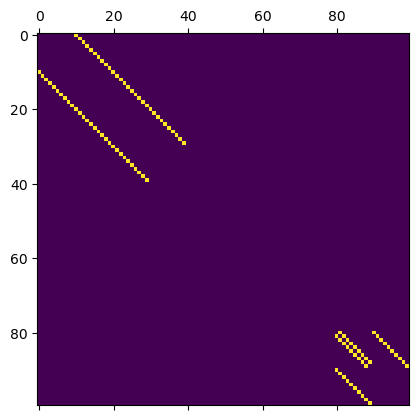

In [586]:
plt.matshow(j)

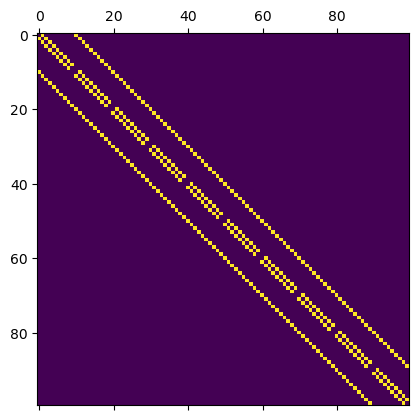

In [587]:
N_spins = 100
j=np.zeros((N_spins,N_spins))
sq_len = int(np.sqrt(N_spins))

for i in range(0,sq_len):
    for k in range(i*sq_len, (i+1)*sq_len-1):
        j[k, k+1]=1
        j[k+1,k]=1 

for i in range(0,sq_len-1):
    for k in range(i*sq_len, (i+1)*sq_len):
        j[k, k+sq_len]=1
        j[k+sq_len,k]=1




plt.matshow(j)

In [588]:
def square_lattice_coupling_matrix_generator(n):
    j=np.zeros((n,n))
    sq_len = int(np.sqrt(n))

    for i in range(0,sq_len):
        for k in range(i*sq_len, (i+1)*sq_len-1):
            j[k, k+1]=1
            j[k+1,k]=1 

    for i in range(0,sq_len-1):
        for k in range(i*sq_len, (i+1)*sq_len):
            j[k, k+sq_len]=1
            j[k+sq_len,k]=1

    return j



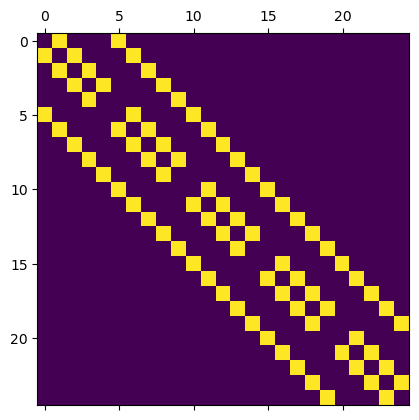

In [589]:
plt.matshow(square_lattice_coupling_matrix_generator(25))

In [590]:
j2= square_lattice_coupling_matrix_generator(100)

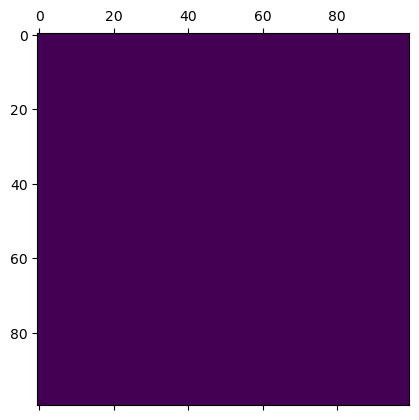

In [593]:
plt.matshow(J-j2)

In [ ]:
bit_precision = 8

a= np.random.normal(0,0.2, (5,1))*3
max_a=np.max(np.abs(a))

b= np.random.normal(0,0.2, (5,1))*3
max_b=np.max(np.abs(b))



In [ ]:
aa=a/(max_a*(2**bit_precision-1))
aa

In [ ]:
p=np.random.uniform(-10,10,(5, 1))
p

In [ ]:
pp=p/(np.max(p))*0.7
pp

In [ ]:
a=np.random.uniform(-10,10,(10, ))
a

In [ ]:
bit_precision=3
dac_volts = np.linspace(-4,4, num=2**bit_precision-1, endpoint=True)
bins=dac_volts+np.abs(dac_volts[0]-dac_volts[1])/2
dac_volts,bins

In [ ]:
v=np.array([-1,4,-4, 3.4, 1,3])#np.random.uniform(-4,4,(10, ))
v

In [ ]:
v_bin_index = np.digitize(v,bins)
v_bin_index

In [ ]:
adc_bit_precision=10
max_v=1
adc_volts = np.linspace(-max_v,max_v, num=2**adc_bit_precision-1, endpoint=True)
bins=adc_volts+np.abs(adc_volts[0]-adc_volts[1])/2
adc_volts

In [ ]:
np.abs(adc_volts[0]-adc_volts[1])

In [ ]:
np.sqrt(0.0005)**2*2

In [ ]:
1e-10*0.001


In [ ]:
for i, j in zip(range(0,len(v)),v_bin_index):
    v[i]=dac_volts[j]

v

In [ ]:
v=np.array([4.1])
index=np.digitize(v, bins)
index

In [ ]:
np.abs(dac_volts[0]-dac_volts[1]), -4+0.03149606299212593

In [ ]:
x = np.array([-0.2, 6.4, 3.0, 9, 11])
bins = np.array([0.0, 1.0, 2.5, 4.0, 10.0])
inds = np.digitize(x, bins)
inds

In [ ]:
v_pi=4
bias=-np.pi/2
bit_precision=4
total_input=2**8
samples_per_input=10

Nsamples=samples_per_input*total_input
output=np.zeros(Nsamples)

t=np.linspace(-v_pi/2,v_pi/2,Nsamples )

counter=0
for i in t:
    output[counter]=np.cos(i*(v_pi/np.pi)+bias)
    counter=counter+1
    if counter%samples_per_input==0:
        

plt.plot(t, output)




In [ ]:
t

In [ ]:
x=np.linspace(0,10, 10)
y=np.random.uniform(-1,1,(10,10))
plt.plot(x,y)

In [ ]:
float_max=1.0
float_min=0.0
I_max=0.7
I_min=0.3



In [ ]:
float_in=0.6

((I_max - I_min)/(float_max - float_min))*float_in + I_max - ((I_max - I_min)/(float_max - float_min))*float_max


In [ ]:
vector_length = 10000
limit=0.1

def normalize(input, norm_limit=limit):
    max = np.max(np.abs(input))
    normalizing_factor = max/norm_limit
    normalized_input = input/normalizing_factor
    return normalized_input , normalizing_factor



input1 = np.random.uniform(-1,1,vector_length)
input2 = np.random.uniform(-1,1,vector_length)

result = np.multiply(np.sin(input1),input2)

input1, input1_scale = normalize(input1)
#input2, input2_scale = normalize(input2)

optical_result = np.multiply(np.sin(input1),np.sin(input2))*input1_scale#*input2_scale

error = result - optical_result
error_std = np.std(error)
error_mean = np.mean(error)

In [ ]:
plt.scatter(result, optical_result, marker='.')
x=np.linspace(-1,1, 10000)
plt.plot(x,x, color='red')

In [ ]:


plt.hist(error, bins='auto')
plt.show()

error_mean, error_std



In [622]:
from scipy import stats


In [644]:
def estimate_coef(x, y):
  # number of observations/points
  n = np.size(x)
 
  # mean of x and y vector
  m_x = np.mean(x)
  m_y = np.mean(y)
 
  # calculating cross-deviation and deviation about x
  SS_xy = np.sum(y*x) - n*m_y*m_x
  SS_xx = np.sum(x*x) - n*m_x*m_x
 
  # calculating regression coefficients
  b_1 = SS_xy / SS_xx
  b_0 = m_y - b_1*m_x
 
  return (b_0, b_1)



def plot_regression_line(x, y, b0, b1):
  # plotting the actual points as scatter plot
  plt.scatter(x, y, color = "m",
        marker = "o", s = 10)
 
  # predicted response vector
  y_pred = b0 + b1*x
 
  # plotting the regression line
  plt.plot(x, y_pred, color = "g")
 
  # putting labels
  plt.xlabel('x')
  plt.ylabel('y')

In [645]:
x=phir
y=np.real(P_mzi[:,1])
estimate_coef(x, y)

(-1175.4128375507212, 374.30384550673824)

In [646]:
np.mean(x)

3.141592653589793

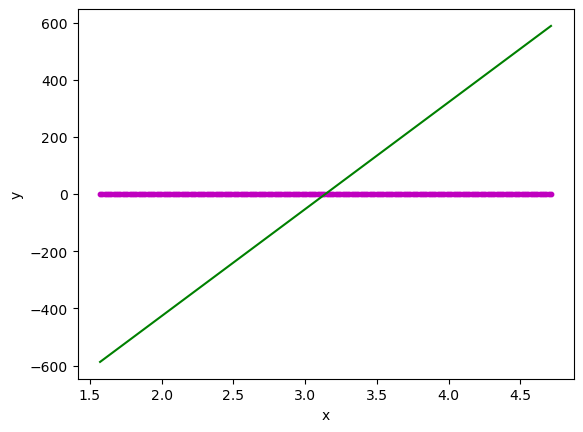

In [641]:
b_0, b_1 = estimate_coef(x,y )
plot_regression_line(x, y, b_0, b_1)

In [953]:
def dc_matrix(a):
    mat=np.matrix([[np.sqrt(0.5), 1.j*np.sqrt(0.5)], [1.j*np.sqrt(0.5), np.sqrt(0.5)]])
    return mat

def arm_matrix(phi,theta=0):
    return np.matrix([[np.exp((1.j)*(np.pi+phi))*((a-t*np.exp(-1.j*phi))/(1-a*t*np.exp(1.j*phi))), 0], [0, np.exp(1.j*theta)]])

def y_split(input_field):
    return np.matrix([[input_field/np.sqrt(2)],[input_field/np.sqrt(2)]])

def y_combine(input_field):
    return np.array([(1/np.sqrt(2))*input_field[0] + (1/np.sqrt(2))*input_field[1]])


def arm_matrix1(phi):
    return np.matrix([[(-1.j)*np.exp((1.j)*(np.pi+phi))*((a-t*np.exp(-1.j*phi))/(1-a*t*np.exp(1.j*phi))), 0], [0, (1.j)*np.exp((1.j)*(np.pi-phi))*((a-t*np.exp(1.j*phi))/(1-a*t*np.exp(-1.j*phi)))]])

def arm_matrix0(phi):
    return np.matrix([[np.exp(1.j*phi), 0], [0, np.exp(-1.j*phi)]])


In [745]:
np.matmul(dc_matrix(1), y_split(1+0.j))

matrix([[0.5+0.5j],
        [0.5+0.5j]])

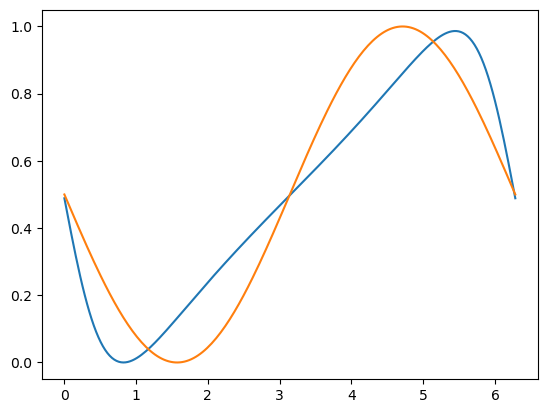

In [755]:
a=0.99
k=0.92
t=np.sqrt(1-np.square(k))
theta=5*np.pi +np.pi/2

E_mzi = []
#E_mzi_phase = []
#P_mzi = []



phir= np.linspace(0,2*np.pi, 200) 
for phi in phir:
    res0 = np.matmul(dc_matrix(1), np.matrix([[1], [0]]))
    res1 = np.matmul( arm_matrix(phi=phi,theta=theta), res0)
    res2 = np.matmul(dc_matrix(1), res1)
    E_mzi.append(res2)
    #E_mzi_phase.append(np.angle(res2))
    #P_mzi.append(res2*np.conj(res2))

E_mzi = np.array(E_mzi)
E_mzi_phase = np.angle(E_mzi)
P_mzi = np.real(E_mzi*np.conj(E_mzi))

arm=0

#plt.plot(phir,np.real(E_mzi[:,arm]))
#plt.plot(phir,np.imag(E_mzi[:,arm]))

#plt.plot(phir,E_mzi_phase[:,arm])
plt.plot(phir,P_mzi[:,arm])

#plt.plot(phir,E_mzi[:,1])
#plt.plot(phir,E_mzi_phase[:,1])
#plt.plot(phir,P_mzi[:,1])

plt.plot(phir, 0.5*-np.sin(phir)+.5)

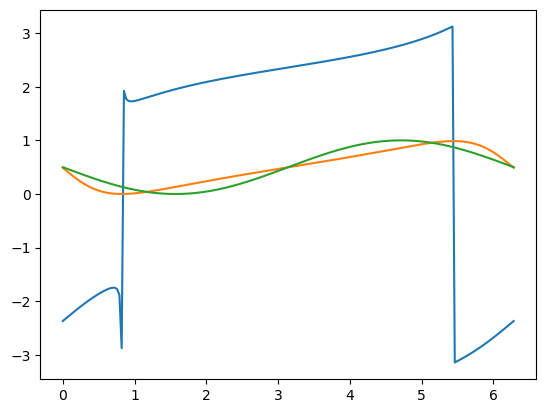

In [686]:
a=0.99
k=0.92
t=np.sqrt(1-np.square(k))
theta=2*np.pi +np.pi/2

E_mzi = []
#E_mzi_phase = []
#P_mzi = []



phir= np.linspace(0,2*np.pi, 200) 
for phi in phir:
    res0 = np.matmul(dc_matrix(1), np.matrix([[1], [0]]))
    res1 = np.matmul( arm_matrix(phi=phi,theta=theta), res0)
    res2 = np.matmul(dc_matrix(1), res1)
    E_mzi.append(res2)
    #E_mzi_phase.append(np.angle(res2))
    #P_mzi.append(res2*np.conj(res2))

E_mzi = np.array(E_mzi)
E_mzi_phase = np.angle(E_mzi)
P_mzi = np.real(E_mzi*np.conj(E_mzi))

arm=1

#plt.plot(phir,E_mzi[:,arm])
plt.plot(phir,E_mzi_phase[:,arm])
plt.plot(phir,P_mzi[:,arm])

#plt.plot(phir,E_mzi[:,1])
#plt.plot(phir,E_mzi_phase[:,1])
#plt.plot(phir,P_mzi[:,1])

#plt.plot(phir,E_mzi[:,arm]*2+1)

plt.plot(phir, 0.5*np.cos(phir+np.pi/2)+.5)

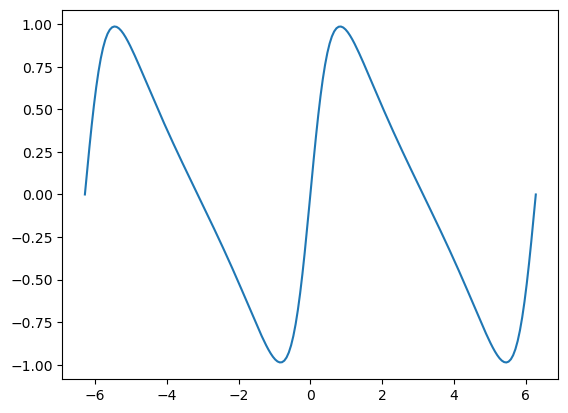

In [872]:
a=0.99
k=0.92
t=np.sqrt(1-np.square(k))
theta=1*np.pi +np.pi/2

E = []
#E_mzi_phase = []
#P_mzi = []



phir= np.linspace(-2*np.pi,2*np.pi, 200) 
for phi in phir:
    #phi = -phi
    res2 =np.exp((1.j)*(np.pi+phi))*((a-t*np.exp(-1.j*phi))/(1-a*t*np.exp(1.j*phi)))
    E.append(res2)
    #E_mzi_phase.append(np.angle(res2))
    #P_mzi.append(res2*np.conj(res2))

E = np.array(E)*1.j
E_phase = np.angle(E)
P = np.real(E*np.conj(E))


plt.plot(phir,np.real(E))
#plt.plot(phir,np.imag(E))

#plt.plot(phir,E_phase)
#plt.plot(phir,P)



#plt.plot(phir,E[:,arm]*2+1)

#plt.plot(phir, 0.5*np.cos(phir+np.pi/2)+.5)

![Screenshot from 2023-12-17 19-56-56.png](<attachment:Screenshot from 2023-12-17 19-56-56.png>)
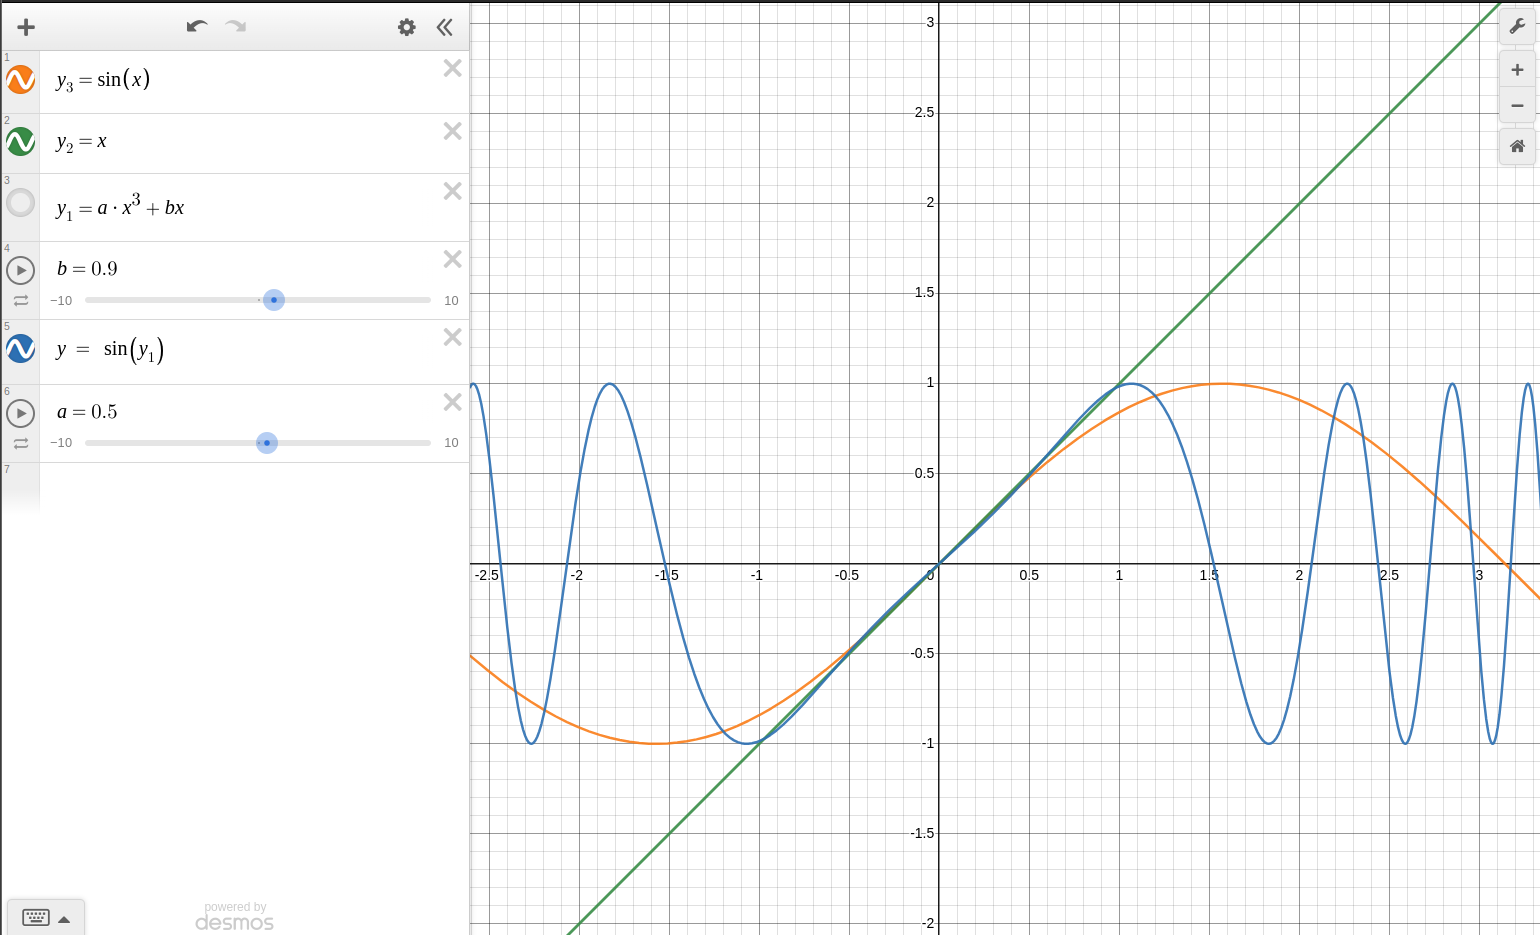

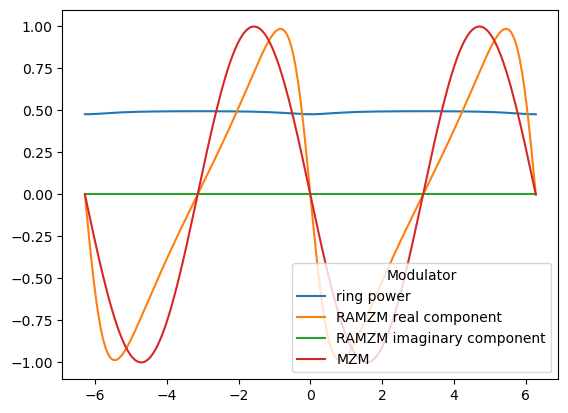

In [968]:
a=0.99
k=0.92
t=np.sqrt(1-np.square(k))
theta=2*np.pi +np.pi/2

E_mzi = []
#E_mzi_phase = []
#P_mzi = []
ring=[]


phir= np.linspace(-2*np.pi,2*np.pi , 200) 
for phi in phir:
    res0 = y_split(1)
    res1 = np.matmul( arm_matrix1(phi=phi), res0)
    ring.append(res1)
    res2 = y_combine(res1)
    E_mzi.append(res2)
    #E_mzi_phase.append(np.angle(res2))
    #P_mzi.append(res2*np.conj(res2))

E_mzi = np.array(E_mzi).reshape(-1,)
E_mzi_phase = np.angle(E_mzi)
P_mzi = np.real(E_mzi*np.conj(E_mzi))

ring=np.array(ring)
P_ring = np.real(ring*np.conj(ring))
#plt.plot(phir,np.real(ring)[:,0], label='ring')
plt.plot(phir,P_ring[:,0], label='ring power')

plt.plot(phir,np.real(E_mzi), label="RAMZM real component")
plt.plot(phir,np.imag(E_mzi), label='RAMZM imaginary component')
#plt.plot(phir,E_mzi_phase, label='RAMZM phase')
#plt.plot(phir,P_mzi)

plt.plot(phir, np.cos(phir+np.pi/2), label="MZM")
plt.legend(title='Modulator')


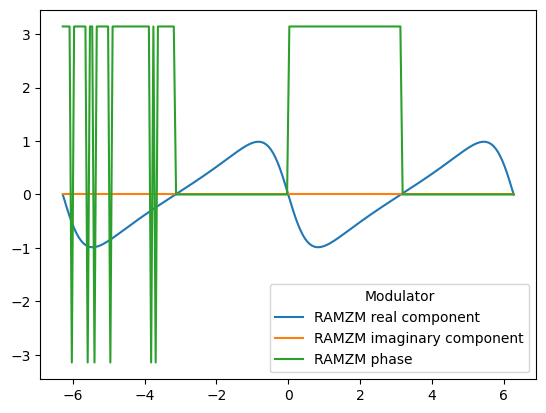

In [969]:
#plt.plot(phir,P_ring[:,0], label='ring power')

plt.plot(phir,np.real(E_mzi), label="RAMZM real component")
plt.plot(phir,np.imag(E_mzi), label='RAMZM imaginary component')
plt.plot(phir,E_mzi_phase, label='RAMZM phase')
#plt.plot(phir,P_mzi)

#plt.plot(phir, np.cos(phir+np.pi/2), label="MZM")
plt.legend(title='Modulator')


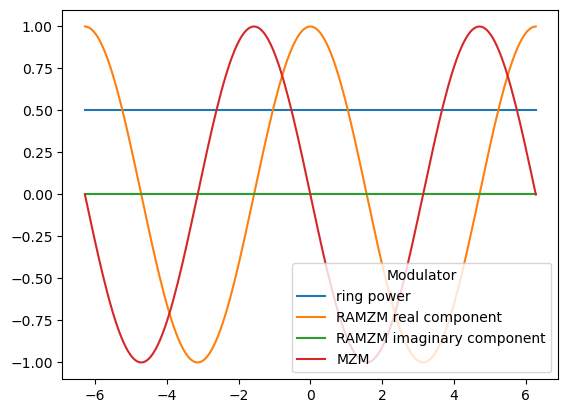

In [966]:
a=0.99
k=0.92
t=np.sqrt(1-np.square(k))
theta=2*np.pi +np.pi/2

E_mzi = []
#E_mzi_phase = []
#P_mzi = []
ring=[]


phir= np.linspace(-2*np.pi,2*np.pi , 200) 
for phi in phir:
    res0 = y_split(1)
    res1 = np.matmul( arm_matrix0(phi=phi), res0)
    ring.append(res1)
    res2 = y_combine(res1)
    E_mzi.append(res2)
    #E_mzi_phase.append(np.angle(res2))
    #P_mzi.append(res2*np.conj(res2))

E_mzi = np.array(E_mzi).reshape(-1,)
E_mzi_phase = np.angle(E_mzi)
P_mzi = np.real(E_mzi*np.conj(E_mzi))

ring=np.array(ring)
P_ring = np.real(ring*np.conj(ring))
#plt.plot(phir,np.real(ring)[:,0], label='ring')
plt.plot(phir,P_ring[:,0], label='ring power')

plt.plot(phir,np.real(E_mzi), label="RAMZM real component")
plt.plot(phir,np.imag(E_mzi), label='RAMZM imaginary component')
#plt.plot(phir,E_mzi_phase, label='RAMZM phase')
#plt.plot(phir,P_mzi)

plt.plot(phir, np.cos(phir+np.pi/2), label="MZM")
plt.legend(title='Modulator')


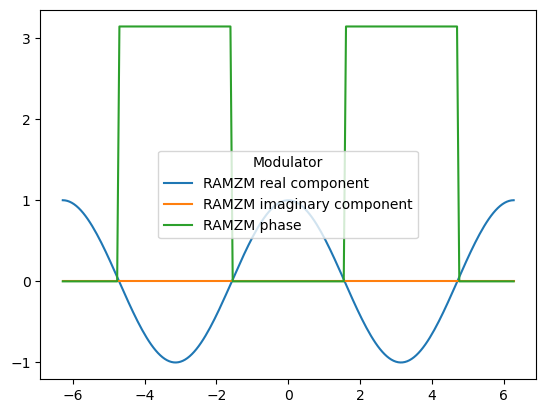

In [967]:
#plt.plot(phir,P_ring[:,0], label='ring power')

plt.plot(phir,np.real(E_mzi), label="RAMZM real component")
plt.plot(phir,np.imag(E_mzi), label='RAMZM imaginary component')
plt.plot(phir,E_mzi_phase, label='RAMZM phase')
#plt.plot(phir,P_mzi)

#plt.plot(phir, np.cos(phir+np.pi/2), label="MZM")
plt.legend(title='Modulator')
